# Algorithmes pour réduire les dimentions des données
* TSNE : t-distributed Stochastic Neighbor Embedding. t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.
* LocallyLinearEmbedding : Locally linear embedding (LLE) seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding.
* PCA : Principal component analysis. Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD. We use PCA for dense data.
* TruncatedSVD : This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently. We use TruncatedSVD to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.

Quelques remarques:
* T-SNE aide à la visualisation des données. T-SNE ne conserve pas les distances. Il ne faut donc pas appliquer un alogrithme de kmeans ou une CAH sur les sorties ce dernier.  
* Si l'on veut un algorithme de réduction des données qui préserve les distances, on peut utiliser l'algorithme PCA
* TruncatedSVD s'utilise dans le contexte du text mining dans le cadre de donnée sparse/creuse

# Algorithmes de clustering vues dans ce chapitre
Dans ce chapitre on applique l'algorithme du Kmeans et celui de la classification ascendante hiérarchique.  Ces derniers des sont algorithmes non supervisé. On veut découvrire des pattern/formes. On admet que ces algorithmes ont été vu dans le cadre de cours plus théorique. Voici les liens wikipédia:
* https://en.wikipedia.org/wiki/K-means_clustering
* https://fr.wikipedia.org/wiki/Regroupement_hi%C3%A9rarchique

# Application de l'algorithmes kmeans et CAH sur les données digit
Les données digit sont accessibles via le package sklearn.datasets. L'objet X représente les données digits. Il y 1797 lignes. Chaques lignes à 64 colonnes. Un chiffre est donc représenté par ces 64 colonnes. Nous avons donc 10 classes dans ce jeux de données. L'objet Y représente les classes des données. On utilise ces derniers à tire indicatif.  

On charge les données digits:

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
X.shape

(1797, 64)

On charge les classes:

In [3]:
Y = digits.target
Y.shape

(1797,)

## On commence par représenter les données graphiquement avec un TSNE
On réduit les dimensions à l'aide du TSNE avant la représentation graphique : on passe de 64 colonnes à 2 colonnes.

In [4]:
from sklearn.manifold import TSNE
t_sne = TSNE(n_components=2,random_state=1998)

X_proj = t_sne.fit_transform(X)
X_proj[0:2]

array([[ 16.781614, -66.73827 ],
       [-10.757889,  22.564926]], dtype=float32)

On peut faire la representation:

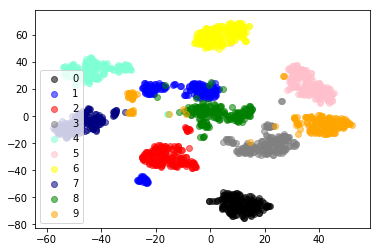

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X_proj[:,0][Y==0],X_proj[:,1][Y==0],color='black',alpha=6/11,label='0')
plt.scatter(X_proj[:,0][Y==1],X_proj[:,1][Y==1],color='blue',alpha=6/11,label='1')
plt.scatter(X_proj[:,0][Y==2],X_proj[:,1][Y==2],color='red',alpha=6/11,label='2')
plt.scatter(X_proj[:,0][Y==3],X_proj[:,1][Y==3],color='grey',alpha=6/11,label='3')
plt.scatter(X_proj[:,0][Y==4],X_proj[:,1][Y==4],color='aquamarine',alpha=6/11,label='4')
plt.scatter(X_proj[:,0][Y==5],X_proj[:,1][Y==5],color='pink',alpha=6/11,label='5')
plt.scatter(X_proj[:,0][Y==6],X_proj[:,1][Y==6],color='yellow',alpha=6/11,label='6')
plt.scatter(X_proj[:,0][Y==7],X_proj[:,1][Y==7],color='navy',alpha=6/11,label='7')
plt.scatter(X_proj[:,0][Y==8],X_proj[:,1][Y==8],color='green',alpha=6/11,label='8')
plt.scatter(X_proj[:,0][Y==9],X_proj[:,1][Y==9],color='orange',alpha=6/11,label='9')
plt.legend(loc=3)
#for i in range(0,len(Y)):
    #plt.text(X_proj[i,0],X_proj[i,1],str(Y[i]))
plt.show()

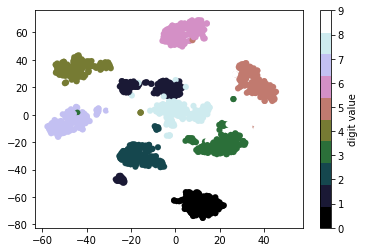

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X_proj[:, 0], X_proj[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 10))
plt.colorbar(ticks=range(10), label='digit value')

## On fait un algorithme du K_means sur les données digit
On fait un k_means à 10 classes donc 10 centroides. 

In [6]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=10,max_iter=20000,n_init=1000)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=20000,
    n_clusters=10, n_init=1000, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

On regarde dans quel cluster sont les élément de X en utilisant fit_predict:

In [7]:
kmean.fit_predict(X)

array([7, 1, 1, ..., 1, 6, 6])

Les centres des clusters sont:

In [8]:
centre = kmean.cluster_centers_

L'inertie de ces 10 classes est:

In [9]:
kmean.inertia_

1165119.9814250746

On représente les données avec leur classes retourné par l'algorithme k_means. On utilise les données projeté avec l'algorithme T_sne:

<function matplotlib.pyplot.show(*args, **kw)>

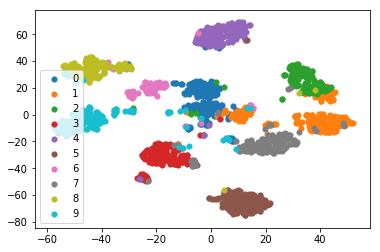

In [10]:
Y_pred = kmean.fit_predict(X)

import numpy as np

import matplotlib.pyplot as plt

for o in np.unique(Y_pred):
    plt.scatter(X_proj[:,0][Y_pred==o], X_proj[:, 1][Y_pred==o], label=o,lw=0.1)
plt.legend(loc=3)
plt.show
#plt.colorbar(ticks=range(10), label='digit value')

## On fait une classification hiérarchique sur les données digit
1/Cette classification serat faite sur 10 clusters.

In [11]:
from sklearn.cluster import AgglomerativeClustering

#on peut utiliser les différent linkage: “ward”, “complete”, “average”, “single”
CAH = AgglomerativeClustering(n_clusters=10, affinity='euclidean',linkage='ward')
clustering = CAH.fit(X)
clusteringbis = CAH.fit_predict(X)

2/On affiche les clusters avec clustering.labels_, ou bien clusteringbis:

In [12]:
clustering.labels_

array([7, 9, 4, ..., 4, 1, 4], dtype=int64)

On représente les clusters avec l'embeding produit par le TSNE:

<function matplotlib.pyplot.show(*args, **kw)>

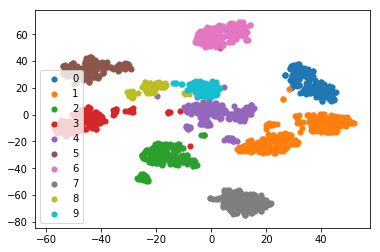

In [13]:
Y_pred = clustering.labels_

import numpy as np
import matplotlib.pyplot as plt

for o in np.unique(Y_pred):
    plt.scatter(X_proj[:,0][Y_pred==o], X_proj[:, 1][Y_pred==o], label=o,lw=0.1)
plt.legend(loc=3)
plt.show

On peut constater que l'algorithme kmeans detecte correctement les paterns.

On construit un dendogramme:

<function matplotlib.pyplot.show(*args, **kw)>

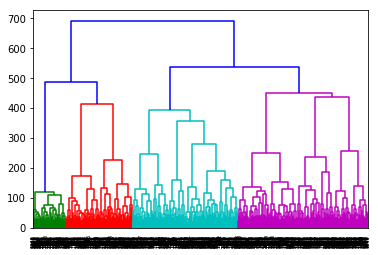

In [14]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(X, method='ward',metric='euclidean')

plt.figure()
dn = hierarchy.dendrogram(Z)
plt.show

## Régle du coude

On simule un ensemble de données à trois dimensions. Il y a 3 classes dans cet ensemble.

In [15]:
import numpy as np
y1 = np.random.normal(loc=2,scale=1,size=400)
y2 = np.random.normal(loc=2,scale=1,size=400)
y3 = np.random.normal(loc=2,scale=1,size=400)
Z1 = np.vstack((y1,y2,y3)).T

y1 = np.random.normal(loc=3.2,scale=1,size=400)
y2 = np.random.normal(loc=3.2,scale=1,size=400)
y3 = np.random.normal(loc=3.2,scale=1,size=400)
Z2 = np.vstack((y1,y2,y3)).T

y1 = np.random.normal(loc=4.4,scale=1,size=400)
y2 = np.random.normal(loc=4.4,scale=1,size=400)
y3 = np.random.normal(loc=4.4,scale=1,size=400)
Z3 = np.vstack((y1,y2,y3)).T

TOT = np.vstack((Z1,Z2,Z3))
#np.random.shuffle(TOT)
cat = np.concatenate((np.ones(400,dtype=int),2*np.ones(400,dtype=int),3*np.ones(400,dtype=int)),axis=0)

On fait le graphique de l'inertie en fonction du nombre de classe que retourne l'algorithme du Kmeans.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

TOT_scal = StandardScaler().fit_transform(TOT)

inertia = []

nb_clus = range(1,8)
for k in nb_clus:
    kmeanmodel = KMeans(n_clusters=k,max_iter=1000,n_init=50).fit(TOT)
    inertia.append(kmeanmodel.inertia_)    

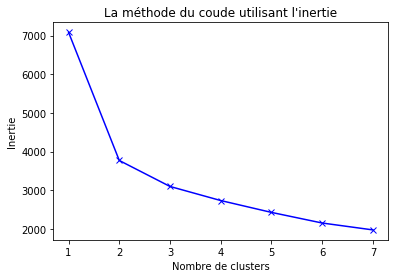

In [17]:
plt.plot(nb_clus,inertia,'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title("La méthode du coude utilisant l'inertie")
plt.show()

Le nombre de cluster optimum se situe au niveau du coude. On choisit 3. C'était prévisible, on avait simulé un ensemble de point à 3 classes.

# Exercice mélange de loi

1/ Simuler un mélange de loi de taille 1000. Ce mélange de loi aura 3 lois. Chaque loi sera simulé par des vecteurs gaussiens de dimention 2. Les moyennes de ces classes sont respectivement (1,1), (3,3), (5,5). Les covarainces de ces 3 classes sont des matrices diagonales avec des 1. La probabilité d'apparition de ces classes est respectivement 1/4,1/4,1/2. Ce mélange deloi sera stocke dans MIX_DATA. 

2/ En vous inspirant de l'exemple ci_dessus appliquer la régle du coude pour déterminer le nombre de cluster optimum.

3/ Fait un kmean à 3 classes sur les données MIX_DATA. 

4/ Faite une représentation mettant en évidence les 3 classes. (on utilise pas le TSNE). Vous devez obtenir un graphique semblable à celui ci-dessous.

<function matplotlib.pyplot.show(*args, **kw)>

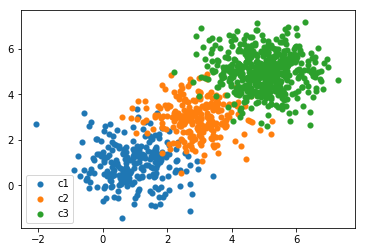

5/Faite une représentation mettant en évidence les pattern produits par le modèle kmeans de la question 3.

<function matplotlib.pyplot.show(*args, **kw)>

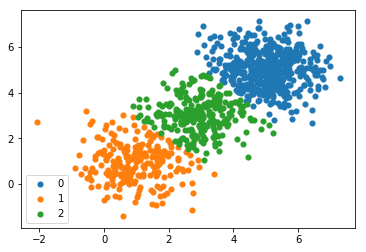

6/ Faire classification hiérarchique à 3 classes. Représenter les données mettant en évidence les classes de la CAH.

# Exercice sur données lettres
Dans cet exercice on va appliquer les algorithmes Kmeans et CAH sur des images représentants des lettres. Chaques image est modélisé par une matrice 28x28=784 pixels. Chaque pixel représente un niveau de gris. (dans le cas d'image en couleur on a 3 couche de pixel: une couche rouge, une couche verte, une couche bleu. 

 1/ importation image : dataset 
* Pour importer les images et les transformer on objet numpy on utilise matplotlib.pyplot.imread.
* Pour afficher une image on utilise matplotlib.pyplot.imread.imshow.
* La fonction numpy.ravel() permet d'applatire un vecteur.
Ci-dessous im1 représente l'image sous forme de matrice

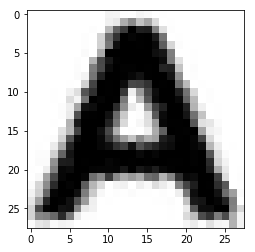

In [12]:
import matplotlib.pyplot as plt
im1 = plt.imread('C:/Users/IFDU1270/Desktop/mooctenseor/notMNIST_small/A/MDEtMDEtMDAudHRm.png')
plt.imshow(im1, cmap='binary')
plt.show()

In [14]:
im1.shape

(28, 28)

Ici im1bis est le vecteur représentant l'image. Il vient de la matrice im1 que l'on a applati.  

In [15]:
im1bis = im1.ravel()
im1bis.shape

(784,)

Vous devez télécharger les données suivantes: https://1drv.ms/u/s!Am09h0q2OIX0bzaaz8qoN9suO8U?e=KeVWxS. Ces données sont un ensembles de 2800 images environ. Il faut décompresser ce fichier et placer placer le résultat dans un répétoire vide image.

Transformer toutes les images du répétoire IMAGE en des vecteurs du type im1bis. Ensuite à partire de ces vecteurs faire une matrice dont chaque ligne est un vecteur de taille 784 représentant une image. Cette matrice sera stocke dans X_image_vect.

In [55]:
import os
images = os.listdir("C:/Users/IFDU1270/Desktop/imagekmeans")
images = ["C:/Users/IFDU1270/Desktop/imagekmeans/"+o for o in images]

2/Appliquer une regle du coude pour déterminer le nombre de classe optimum. Dans la suite on admettra que le nombre optimum de classe est 4. On oublira pas de mettre à l'echelle les données (StandardScaler()).

In [58]:
from sklearn.preprocessing import StandardScaler

On fait ensuite le graphe du coude:

3/Représenter les données X_image_vect à l'aide dun TSNE à 2 composantes. On utilise les données X_image_vect.

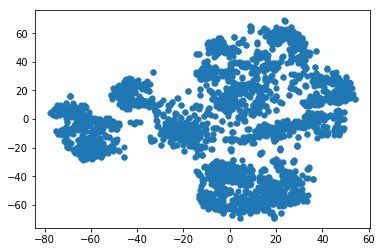

4/Faite un kmeans dont le nombre de cluster est 4. Ce modele s'appelle kmean4. Il faut entrainer ce modele. Ensuite afficher kmean4.labels

5/ Représenter les données avec leurs labels en utilisant un TSNE. Une couleur par label.

<function matplotlib.pyplot.show(*args, **kw)>

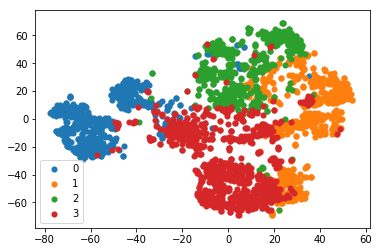

6/Afficher les données de 4 images ayant le label 0.

In [73]:
import numpy as np

#ici on détecte les éléments yant pour label 0 
X_0 = X_image_vect[kmean4.labels_==0,:]
X_0_list = X_0.tolist()

#on reconstitue chaque matrice
X_0_list_image = [np.array(o).reshape(28,28) for o in X_0_list]

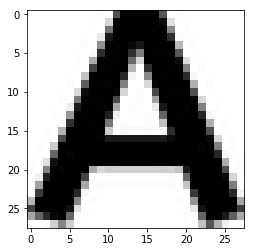

In [75]:
im1 = X_0_list_image[0]

import matplotlib.pyplot as plt
plt.imshow(im1, cmap='binary')
plt.show()

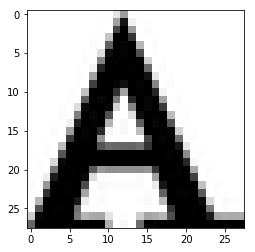

In [76]:
im2 = X_0_list_image[1]

import matplotlib.pyplot as plt
plt.imshow(im2, cmap='binary')
plt.show()

7/Faite comme dans la quetion précédante mais pour la classe 3. Conclure. 